In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [3]:
with open("stock.txt","r") as f:
    stock = f.readline()
print(stock)

NUCLEUS.NS


In [4]:
reliance=yf.Ticker(stock)
history=reliance.history(period="5y")
df=pd.DataFrame(history)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1236 entries, 2018-11-02 00:00:00+05:30 to 2023-11-02 00:00:00+05:30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1236 non-null   float64
 1   High          1236 non-null   float64
 2   Low           1236 non-null   float64
 3   Close         1236 non-null   float64
 4   Volume        1236 non-null   int64  
 5   Dividends     1236 non-null   float64
 6   Stock Splits  1236 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 77.2 KB


In [6]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1236.000000,1236.000000,1236.000000,1236.000000,1.236000e+03,1236.000000,1236.0
mean,485.581389,496.152448,475.572388,484.418925,9.505607e+04,0.028317,0.0
std,233.882934,240.995888,226.403103,233.232217,2.040163e+05,0.471030,0.0
min,167.599317,175.689655,149.695251,170.471603,0.000000e+00,0.000000,0.0
25%,325.063290,330.285275,319.967424,323.698341,1.130900e+04,0.000000,0.0
50%,414.788351,422.640989,406.428425,413.537888,3.338650e+04,0.000000,0.0
75%,567.740289,577.341085,559.100792,565.106277,9.046175e+04,0.000000,0.0
max,1619.000000,1623.300049,1565.250000,1590.949951,2.515273e+06,10.000000,0.0



# SARIMAX Model:-


In [7]:
data = list(df["Close"])

In [8]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data)
print("1. ADF : ",result[0])
print("2. P-Value : ", result[1])
print("3. Num Of Lags : ", result[2])
print("4. Num Of Observations Used For ADF Regression:", result[3])
print("5. Critical Values :")
for key, val in result[4].items():
  print("\t",key, ": ", val)

1. ADF :  1.1759124545086928
2. P-Value :  0.9958151618010076
3. Num Of Lags :  21
4. Num Of Observations Used For ADF Regression: 1214
5. Critical Values :
	 1% :  -3.4357480073434905
	 5% :  -2.863923702481129
	 10% :  -2.568039121778048


In [9]:
from pmdarima.arima.utils import ndiffs
d_value = ndiffs(data,test = "adf")
print("d value:", d_value)

d value: 1


In [10]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [11]:
x_train= data[:-100]
x_test = data[-100:]
print(len(x_train),len(x_test))

1136 100


In [12]:
stepwise_fit = auto_arima(data,trace=True,suppress_warnings=True, seasonal=True)
print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.44 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=11288.620, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=11000.952, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=10581.285, Time=0.06 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 1.093 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1236
Model:               SARIMAX(0, 2, 1)   Log Likelihood               -5288.642
Date:                Thu, 02 Nov 2023   AIC                          10581.285
Time:                        11:43:48   BIC               

In [13]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(data, order=(2,1,2))

In [14]:
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1236
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -5278.221
Date:                Thu, 02 Nov 2023   AIC                          10566.441
Time:                        11:43:49   BIC                          10592.035
Sample:                             0   HQIC                         10576.069
                               - 1236                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2416      0.223      1.084      0.278      -0.195       0.678
ar.L2          0.4744      0.151      3.139      0.002       0.178       0.771
ma.L1         -0.1178      0.223     -0.529      0.597      -0.555       0.319
ma.L2         -0.4677      0.127     -3.675      0.000      -0.717      -0.218
sigma2       301.8184      4.665     64.700      0.000     292.675     310.961
===================================================================================
Ljung-Box (L1) (Q):                   0.60   Jarque-Bera (JB):             10631.63
Prob(Q):                              0.44   Prob(JB):                         0.00
Heteroskedasticity (H):              18.12   Skew:                             1.59
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
start=len(x_train)
end=len(x_train)+len(x_test)-1
pred = model.predict(start=start,end=end)
pred

array([1118.3204531 , 1120.10766795, 1171.88608921, 1098.04243533,
       1120.38874553, 1132.60553177, 1108.15415492, 1043.01382416,
       1036.23788659, 1051.69099057, 1030.76658281, 1014.67191126,
       1001.67245651,  986.86023862,  988.50824027, 1070.37579417,
       1069.85969882, 1083.37261822, 1091.41451649, 1086.7084017 ,
       1107.06434119, 1078.3052818 , 1076.07400882, 1195.4669839 ,
       1103.6814925 , 1204.67871894, 1225.03521535, 1166.60728579,
       1112.71433697, 1117.50803809, 1087.00399836, 1108.8213853 ,
       1055.11769517, 1083.15458018, 1083.51301817, 1087.51412238,
       1116.51775363, 1117.52330637, 1142.94267978, 1177.68193441,
       1102.84210718, 1143.11467077, 1098.1579728 , 1095.94301843,
       1054.46284956, 1009.16814621,  988.59788122, 1075.05978054,
       1044.49923943, 1016.17440801, 1017.41999315, 1029.16726565,
       1012.54683871, 1004.66099351, 1002.44293606, 1000.41489482,
        986.02113552, 1002.20401681, 1005.52985456, 1012.70671

In [16]:
s = pd.Series(pred, index =df.index[-100:])
s

Date
2023-06-09 00:00:00+05:30    1118.320453
2023-06-12 00:00:00+05:30    1120.107668
2023-06-13 00:00:00+05:30    1171.886089
2023-06-14 00:00:00+05:30    1098.042435
2023-06-15 00:00:00+05:30    1120.388746
                                ...     
2023-10-27 00:00:00+05:30    1486.894632
2023-10-30 00:00:00+05:30    1572.512847
2023-10-31 00:00:00+05:30    1599.773085
2023-11-01 00:00:00+05:30    1524.353043
2023-11-02 00:00:00+05:30    1519.491726
Length: 100, dtype: float64

<Axes: xlabel='Date'>

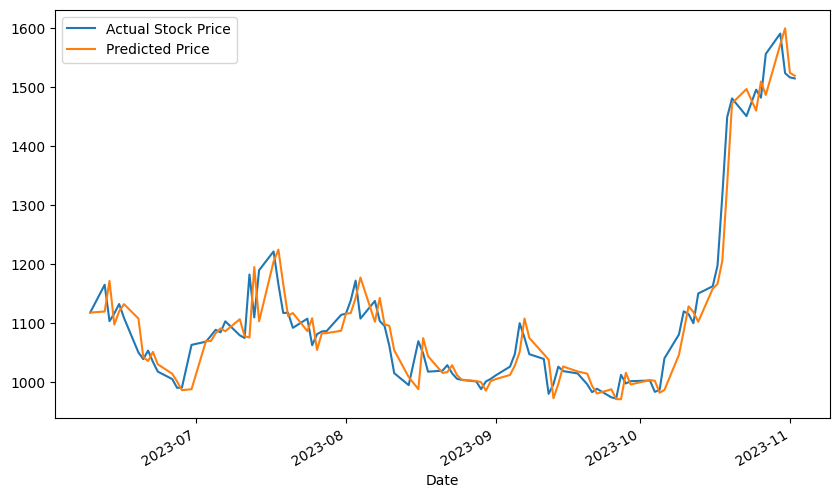

In [17]:
plt.figure(figsize=(10,6), dpi=100)
df['Close'][-100:].plot(label='Actual Stock Price', legend=True)
s.plot(label='Predicted Price', legend=True,)

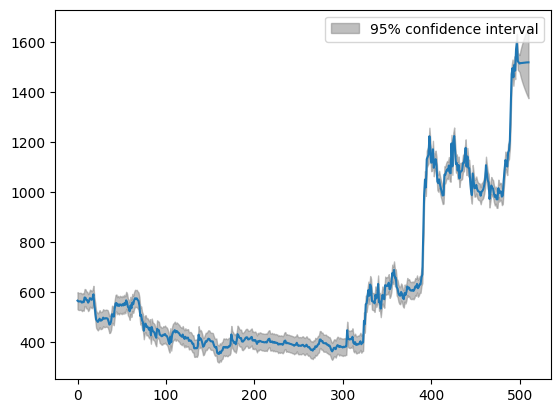

In [18]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model, start = len(data)-500, end = len(data)+10, dynamic = False);

In [19]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(x_test,pred))

37.24685782493486

In [20]:
from sklearn.metrics import r2_score
r2_score(x_test,pred)

0.9350653309006791

# Predicting Future values:

In [21]:
Close_pred = model.predict(start=end+1,end=end+3)
Close_pred

array([1515.20490352, 1516.59571362, 1517.07634376])

In [22]:
import datetime
df.index = pd.to_datetime(df.index)

# Change the index format to 'YYYY-MM-DD'
df.index = df.index.strftime('%Y-%m-%d')
df.index

Index(['2018-11-02', '2018-11-05', '2018-11-06', '2018-11-07', '2018-11-09',
       '2018-11-12', '2018-11-13', '2018-11-14', '2018-11-15', '2018-11-16',
       ...
       '2023-10-19', '2023-10-20', '2023-10-23', '2023-10-25', '2023-10-26',
       '2023-10-27', '2023-10-30', '2023-10-31', '2023-11-01', '2023-11-02'],
      dtype='object', name='Date', length=1236)

In [23]:
last_index_date = pd.to_datetime(df.index[-1])

# Get the next 3 days from the last index date
future_dates = [last_index_date + datetime.timedelta(days=i) for i in range(1, 4)]

# Convert future dates to the desired string format 'YYYY-MM-DD'
future_dates_formatted = [date.strftime('%Y-%m-%d') for date in future_dates]

print("Next 3 Days from the Last Index Date:")
print(future_dates_formatted)

Next 3 Days from the Last Index Date:
['2023-11-03', '2023-11-04', '2023-11-05']


In [24]:
CLOSE_PREDICTION = pd.Series(Close_pred, index = future_dates_formatted)
CLOSE_PREDICTION

2023-11-03    1515.204904
2023-11-04    1516.595714
2023-11-05    1517.076344
dtype: float64

<Axes: xlabel='Date'>

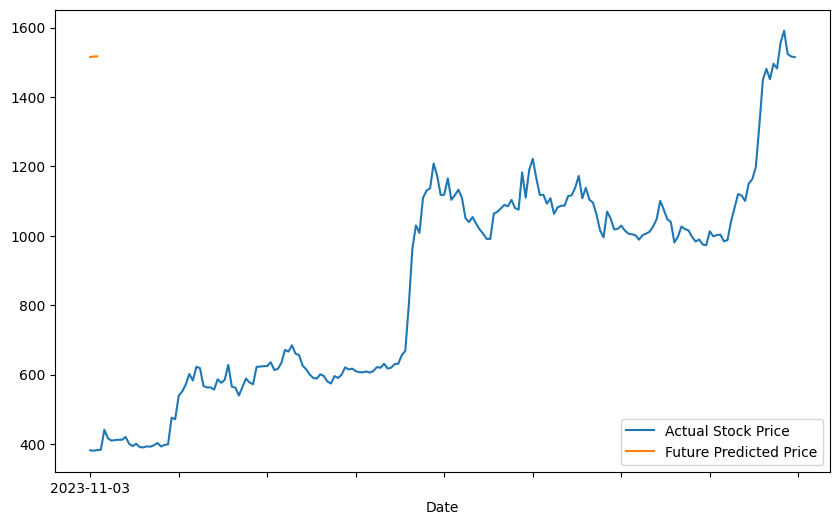

In [25]:
plt.figure(figsize=(10,6), dpi=100)
df['Close'][-200:].plot(label='Actual Stock Price', legend=True)
CLOSE_PREDICTION.plot(label='Future Predicted Price', legend=True)

Open

In [26]:
data = list(df["Open"])

In [27]:
d_value = ndiffs(data,test = "adf")
print("d value:", d_value)

d value: 1


In [28]:
x_train= data[:-100]
x_test = data[-100:]
print(len(x_train),len(x_test))

1136 100


In [29]:
stepwise_fit = auto_arima(data,trace=True,suppress_warnings=True, seasonal=True)
model = sm.tsa.arima.ARIMA(data, order=(2,1,2))
model = model.fit()
start=len(x_train)
end=len(x_train)+len(x_test)-1
pred = model.predict(start=start,end=end)
pred

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10926.865, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10935.300, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10936.991, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10936.998, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10935.996, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10930.413, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10931.537, Time=0.36 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=10927.642, Time=0.45 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=10927.402, Time=0.55 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10938.985, Time=0.11 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=10925.532, Time=0.26 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=10931.724, Time=0.17 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=10927.471, Time=0.84 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=10938.769, Time=0.17 sec
 ARIMA(0,1,4)(0,0,0

array([1223.25442437, 1131.65797708, 1130.43805072, 1170.64400208,
       1117.46171594, 1124.9769749 , 1139.22743252, 1113.17316828,
       1060.10893195, 1048.46725274, 1064.89185813, 1036.42470242,
        991.07650914, 1000.98005181,  987.100154  , 1116.53007015,
       1077.75648979, 1080.04600194, 1052.15308904, 1092.38165064,
       1091.88133227, 1115.99820677, 1083.32296802, 1084.9601647 ,
       1210.41324521, 1139.20709772, 1211.61233836, 1225.71500697,
       1196.996293  , 1134.39638597, 1110.5587059 , 1076.80515881,
       1101.85018255, 1058.19410344, 1086.01019798, 1089.03931581,
       1094.82984012, 1117.56572922, 1125.24812237, 1152.80695641,
       1185.26841524, 1127.16123229, 1151.00790305, 1106.72959178,
       1094.21911836, 1066.65193528, 1007.27706987,  996.38376177,
       1064.61796861, 1039.60055321, 1021.38584731, 1024.35135442,
       1034.51783345, 1025.63252932, 1007.04601034, 1005.97365086,
       1008.76525988,  989.53349053, 1000.08059065, 1005.46840

In [30]:
np.sqrt(mean_squared_error(x_test,pred))

46.421201550947146

In [31]:
r2_score(x_test,pred)

0.8980424005279862

In [32]:
Open_pred = model.predict(start=end+1,end=end+3)
Open_pred

array([1525.61499312, 1523.97243313, 1520.54843172])

High

In [33]:
data = list(df["High"])

In [34]:
d_value = ndiffs(data,test = "adf")
print("d value:", d_value)

d value: 1


In [35]:
x_train= data[:-100]
x_test = data[-100:]

In [36]:
stepwise_fit = auto_arima(data,trace=True,suppress_warnings=True, seasonal=True)
model = sm.tsa.arima.ARIMA(data, order=(2,1,2))
model = model.fit()
start=len(x_train)
end=len(x_train)+len(x_test)-1
pred = model.predict(start=start,end=end)
pred

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10746.510, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10765.481, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10756.702, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10758.255, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10766.629, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10745.923, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=10752.763, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10744.645, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10745.946, Time=0.23 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=10750.017, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=10744.257, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=10758.968, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=10757.302, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=10745.566, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


array([1218.89982277, 1148.62102249, 1201.99711111, 1185.47715741,
       1143.88424172, 1171.03198728, 1142.66806075, 1122.14467121,
       1069.56730612, 1131.74130048, 1072.34000416, 1046.08510263,
       1025.46536725, 1039.58456395,  986.82533763, 1130.90390439,
       1124.15192515, 1098.10268588, 1102.37846476, 1126.49759483,
       1129.02579657, 1146.54604423, 1106.79172146, 1185.51618429,
       1239.3596687 , 1208.4281026 , 1259.44459715, 1232.79813858,
       1200.10691514, 1134.32663594, 1126.55827526, 1120.28103871,
       1114.41990346, 1091.43832247, 1115.6710486 , 1098.37206669,
       1123.06716317, 1146.61665298, 1187.23923419, 1195.96243105,
       1272.84309729, 1174.96776141, 1141.1973632 , 1105.27784107,
       1102.8199705 , 1078.68397356, 1004.75296519, 1093.90976906,
       1076.21839962, 1037.90862676, 1034.34545799, 1062.92543621,
       1048.30788839, 1022.06141959, 1014.2104699 , 1014.75041605,
       1017.15294249, 1015.77871392, 1014.43244853, 1019.56717

In [37]:
np.sqrt(mean_squared_error(x_test,pred))

40.31298101180476

In [38]:
r2_score(x_test,pred)

0.9287639616435919

In [39]:
High_pred = model.predict(start=end+1,end=end+3)
High_pred

array([1546.09303575, 1544.657108  , 1543.08297516])

Low

In [40]:
data = list(df["Low"])

In [41]:
d_value = ndiffs(data,test = "adf")
print("d value:", d_value)

d value: 1


In [42]:
x_train= data[:-100]
x_test = data[-100:]

In [43]:
stepwise_fit = auto_arima(data,trace=True,suppress_warnings=True, seasonal=True)
model = sm.tsa.arima.ARIMA(data, order=(2,1,2))
model = model.fit()
start=len(x_train)
end=len(x_train)+len(x_test)-1
pred = model.predict(start=start,end=end)
pred

Performing stepwise search to minimize aic


 ARIMA(2,2,2)(0,0,0)[0]             : AIC=10455.195, Time=0.57 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=11249.446, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=10851.713, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=10455.576, Time=0.05 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=10456.356, Time=0.22 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=inf, Time=0.21 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=10454.837, Time=0.69 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=10455.589, Time=0.49 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=inf, Time=1.23 sec
 ARIMA(2,2,4)(0,0,0)[0]             : AIC=10459.267, Time=1.62 sec
 ARIMA(1,2,4)(0,0,0)[0]             : AIC=inf, Time=0.99 sec
 ARIMA(3,2,4)(0,0,0)[0]             : AIC=10461.554, Time=1.71 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.42 sec

Best model:  ARIMA(2,2,3)(0,0,0)[0]          
Total fit time: 9.404 seconds


array([1101.81174218, 1093.43675496, 1130.80457936, 1065.49235892,
       1089.82100128, 1113.83223032, 1100.83554985, 1040.67325634,
       1022.88814427, 1037.66606879, 1009.30500744, 1002.34644347,
        988.68195569,  978.45821335,  987.85875632, 1052.53809978,
       1063.86115848, 1069.89787361, 1050.06353679, 1079.59564526,
       1093.34265231, 1051.93884203, 1064.23964587, 1079.44626645,
       1081.41681158, 1125.43372838, 1188.29314315, 1159.80201691,
       1092.77273559, 1108.41930419, 1078.19508092, 1076.56021558,
        999.22643235, 1057.24225055, 1068.36989184, 1052.86831026,
       1092.79478727, 1114.9162864 , 1108.64770284, 1138.00041443,
       1057.50346721, 1109.02021128, 1082.15086243, 1083.17759161,
       1050.88602195,  997.52527018,  936.66006193,  993.27983297,
       1042.05069156, 1009.78599988, 1004.79653269, 1025.33006726,
       1012.88743238, 1002.01131655,  988.95965667,  998.74546294,
        983.73882603,  988.67012434,  999.52145495,  981.94115

In [44]:
np.sqrt(mean_squared_error(x_test,pred))

36.3391874819973

In [45]:
r2_score(x_test,pred)

0.9286101291215558

In [46]:
Low_pred = model.predict(start=end+1,end=end+3)
Low_pred

array([1508.14681575, 1509.29326528, 1509.49654631])

In [47]:
# Create a dictionary with keys as column names and values as arrays
data = {
    'Open': Open_pred,
    'High': High_pred,
    'Low': Low_pred,
    'Close': Close_pred
}

# Create a pandas DataFrame from the dictionary
PREDICTION = pd.DataFrame(data, index=future_dates_formatted)
PREDICTION.index.name = 'Date'
df = pd.concat([df, PREDICTION])
df.reset_index(inplace=True) 
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2018-11-02,355.475275,371.194369,355.428642,358.320587,22331.0,0.0,0.0
1,2018-11-05,358.320625,372.780322,356.408196,364.337708,14717.0,0.0,0.0
2,2018-11-06,368.022591,368.022591,358.227313,360.046448,5921.0,0.0,0.0
3,2018-11-07,360.932627,365.690339,359.160154,361.818878,2904.0,0.0,0.0
4,2018-11-09,362.098764,364.757488,357.294419,357.900787,6116.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1234,2023-11-01,1523.900024,1560.000000,1505.000000,1516.650024,14071.0,0.0,0.0
1235,2023-11-02,1522.900024,1548.900024,1505.000000,1514.900024,10887.0,0.0,0.0
1236,2023-11-03,1525.614993,1546.093036,1508.146816,1515.204904,NaN,NaN,NaN
1237,2023-11-04,1523.972433,1544.657108,1509.293265,1516.595714,NaN,NaN,NaN


In [48]:
df.to_csv('output_file.csv', index=False)

In [52]:
import csv
import json
from datetime import datetime
import time
csv_file = '/Users/mukeshpatel/Downloads/output_file.csv'
json_file = '/Users/mukeshpatel/Downloads/output.json'

data = []

with open(csv_file, 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    headers = next(csvreader)  # Assuming the first row contains column headers
    for row in csvreader:
        date_str = row[0].split("+")[0]
        print(date_str)
        date_obj = datetime.strptime(date_str, '%Y-%m-%d')  # Adjust the date format as needed
        # print(date)
        unix_timestamp = int(time.mktime(date_obj.timetuple()))
        print(unix_timestamp)
        open_price = round(float(row[1]),2)
        high_price = round(float(row[2]),2)
        low_price = round(float(row[3]),2)
        close_price = round(float(row[4]),2)
        
        data_point = {
            "x": date_str,
            "y": [open_price, high_price, low_price, close_price]
        }
        data.append(data_point)

# Write the data to a JSON file
with open(json_file, 'w') as jsonfile:
    json.dump(data[-150:], jsonfile, indent=2)

print("Conversion complete. JSON data saved to", json_file)


2018-11-01
1541010600
2018-11-02
1541097000
2018-11-05
1541356200
2018-11-06
1541442600
2018-11-07
1541529000
2018-11-09
1541701800
2018-11-12
1541961000
2018-11-13
1542047400
2018-11-14
1542133800
2018-11-15
1542220200
2018-11-16
1542306600
2018-11-19
1542565800
2018-11-20
1542652200
2018-11-21
1542738600
2018-11-22
1542825000
2018-11-26
1543170600
2018-11-27
1543257000
2018-11-28
1543343400
2018-11-29
1543429800
2018-11-30
1543516200
2018-12-03
1543775400
2018-12-04
1543861800
2018-12-05
1543948200
2018-12-06
1544034600
2018-12-07
1544121000
2018-12-10
1544380200
2018-12-11
1544466600
2018-12-12
1544553000
2018-12-13
1544639400
2018-12-14
1544725800
2018-12-17
1544985000
2018-12-18
1545071400
2018-12-19
1545157800
2018-12-20
1545244200
2018-12-21
1545330600
2018-12-24
1545589800
2018-12-26
1545762600
2018-12-27
1545849000
2018-12-28
1545935400
2018-12-31
1546194600
2019-01-01
1546281000
2019-01-02
1546367400
2019-01-03
1546453800
2019-01-04
1546540200
2019-01-07
1546799400
2019-01-08